In [1]:
import pathlib

import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def display_columns_description(dataframe):
    for column_name in dataframe.columns.tolist():
        print("\n", column_name, " description:\n", dataframe[column_name].describe())

In [3]:
def display_columns_info(dataframe):
    for column_name in dataframe.columns.tolist():
        print("\n", column_name, " info:\n", dataframe[column_name].info())

In [4]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [5]:
#!ls

In [6]:
!ls ../input/

arch			     merchants.csv		    test      train.csv
Data_Dictionary.xlsx	     new_merchant_transactions.csv  test.csv
historical_transactions.csv  sample_submission.csv	    train


In [7]:
historical_transactions_df = pd.read_csv('../input/historical_transactions.csv')

In [9]:
historical_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int64
category_1              object
installments            int64
category_3              object
merchant_category_id    int64
merchant_id             object
month_lag               int64
purchase_amount         float64
purchase_date           object
category_2              float64
state_id                int64
subsector_id            int64
dtypes: float64(2), int64(6), object(6)
memory usage: 3.0+ GB


In [10]:
historical_transactions_df = reduce_mem_usage(historical_transactions_df)

Mem. usage decreased to 1749.11 Mb (43.7% reduction)


In [11]:
historical_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int16
category_1              object
installments            int16
category_3              object
merchant_category_id    int16
merchant_id             object
month_lag               int8
purchase_amount         float32
purchase_date           object
category_2              float16
state_id                int8
subsector_id            int8
dtypes: float16(1), float32(1), int16(3), int8(3), object(6)
memory usage: 1.7+ GB


In [12]:
merchants_df = pd.read_csv('../input/merchants.csv')

In [13]:
merchants_df = reduce_mem_usage(merchants_df)

Mem. usage decreased to 30.32 Mb (46.0% reduction)


In [14]:
new_merchant_transactions_df = pd.read_csv('../input/new_merchant_transactions.csv')

In [15]:
new_merchant_transactions_df = reduce_mem_usage(new_merchant_transactions_df)

Mem. usage decreased to 114.20 Mb (45.5% reduction)


In [16]:
sample_sumbmission_df = pd.read_csv('../input/sample_submission.csv')

In [17]:
sample_sumbmission_df = reduce_mem_usage(sample_sumbmission_df)

Mem. usage decreased to  1.06 Mb (43.7% reduction)


In [18]:
train_df = pd.read_csv('../input/train.csv')

In [19]:
train_df = reduce_mem_usage(train_df)

Mem. usage decreased to  4.04 Mb (56.2% reduction)


In [21]:
test_df = pd.read_csv('../input/test.csv')

In [22]:
test_df = reduce_mem_usage(test_df)

Mem. usage decreased to  2.24 Mb (52.5% reduction)


In [ ]:
historical_transactions_df.info()

In [ ]:
#print("historical_transactions_df.card_id.describe()", historical_transactions_df.card_id.describe())
#print()
#print(historical_transactions_df.city_id.describe())
display_columns_description(historical_transactions_df)

In [23]:
historical_transactions_df.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,26459497.0,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640094e-02,NaN,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,0.0,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.0,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.0,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.0,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.0,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.0,2.400000e+01,4.100000e+01


In [ ]:
#display_columns_info(historical_transactions_df)

In [24]:
historical_transactions_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [25]:
new_merchant_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963031 entries, 0 to 1963030
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int16
category_1              object
installments            int16
category_3              object
merchant_category_id    int16
merchant_id             object
month_lag               int8
purchase_amount         float16
purchase_date           object
category_2              float16
state_id                int8
subsector_id            int8
dtypes: float16(2), int16(3), int8(3), object(6)
memory usage: 114.2+ MB


In [26]:
new_merchant_transactions_df.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1.963031e+06,1851286.0,1.963031e+06,1.963031e+06
mean,1.343867e+02,6.829643e-01,4.309701e+02,1.476515e+00,NaN,NaN,1.088067e+01,2.597624e+01
std,1.015152e+02,1.584069e+00,2.463385e+02,4.994483e-01,NaN,0.0,6.038542e+00,1.012908e+01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00,-7.470703e-01,1.0,-1.000000e+00,-1.000000e+00
25%,6.900000e+01,0.000000e+00,2.780000e+02,1.000000e+00,-7.167969e-01,1.0,9.000000e+00,1.900000e+01
50%,1.100000e+02,1.000000e+00,3.670000e+02,1.000000e+00,-6.748047e-01,1.0,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,6.830000e+02,2.000000e+00,-5.815430e-01,3.0,1.500000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,2.000000e+00,2.632500e+02,5.0,2.400000e+01,4.100000e+01


In [27]:
new_merchant_transactions_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557617,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569336,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551270,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671875,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659668,2018-03-22 21:07:53,NaN,-1,29


In [28]:
merchants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334696 entries, 0 to 334695
Data columns (total 22 columns):
merchant_id                    334696 non-null object
merchant_group_id              334696 non-null int32
merchant_category_id           334696 non-null int16
subsector_id                   334696 non-null int8
numerical_1                    334696 non-null float16
numerical_2                    334696 non-null float16
category_1                     334696 non-null object
most_recent_sales_range        334696 non-null object
most_recent_purchases_range    334696 non-null object
avg_sales_lag3                 334683 non-null float32
avg_purchases_lag3             334696 non-null float64
active_months_lag3             334696 non-null int8
avg_sales_lag6                 334683 non-null float32
avg_purchases_lag6             334696 non-null float64
active_months_lag6             334696 non-null int8
avg_sales_lag12                334683 non-null float32
avg_purchases_lag12       

In [29]:
merchants_df.describe()

,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,avg_sales_lag3,avg_purchases_lag3,active_months_lag3,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,city_id,state_id,category_2
count,334696.000000,334696.000000,334696.000000,334696.000000,334696.000000,334683.000000,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,3.346830e+05,3.346960e+05,334696.000000,334696.000000,334696.000000,322809.0
mean,31028.736143,423.131663,25.116404,0.000000,0.000000,13.832988,inf,2.994108,2.165079e+01,inf,5.947397,2.522771e+01,inf,11.599335,102.917926,11.860942,NaN
std,31623.043426,252.898046,9.807371,0.000000,0.000000,2395.489990,NaN,0.095247,3.947108e+03,NaN,0.394936,5.251842e+03,NaN,1.520138,107.090673,6.176889,0.0
min,1.000000,-1.000000,-1.000000,-0.057465,-0.057465,-82.129997,3.334953e-01,1.000000,-8.213000e+01,1.670447e-01,1.000000,-8.213000e+01,9.832954e-02,1.000000,-1.000000,-1.000000,1.0
25%,3612.000000,222.000000,19.000000,-0.057465,-0.057465,0.880000,9.236499e-01,3.000000,8.500000e-01,9.022475e-01,6.000000,8.500000e-01,8.983333e-01,12.000000,-1.000000,9.000000,1.0
50%,19900.000000,373.000000,27.000000,-0.057465,-0.057465,1.000000,1.016667e+00,3.000000,1.010000e+00,1.026961e+00,6.000000,1.020000e+00,1.043361e+00,12.000000,69.000000,9.000000,2.0
75%,51707.250000,683.000000,33.000000,-0.047546,-0.047546,1.160000,1.146522e+00,3.000000,1.230000e+00,1.215575e+00,6.000000,1.290000e+00,1.266480e+00,12.000000,182.000000,16.000000,4.0
max,112586.000000,891.000000,41.000000,183.750000,182.125000,851844.625000,inf,3.000000,1.513959e+06,inf,6.000000,2.567408e+06,inf,12.000000,347.000000,24.000000,5.0


In [30]:
merchants_df.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057465,-0.057465,N,E,E,-0.400000,...,-2.250000,18.666667,6,-2.320000,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057465,-0.057465,N,E,E,-0.720000,...,-0.740000,1.291667,6,-0.570000,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057465,-0.057465,N,E,E,-82.129997,...,-82.129997,260.000000,2,-82.129997,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057465,-0.057465,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int8
feature_2             201917 non-null int8
feature_3             201917 non-null int8
target                201917 non-null float16
dtypes: float16(1), int8(3), object(2)
memory usage: 4.0+ MB


In [34]:
train_df.describe()

,feature_1,feature_2,feature_3,target
count,201917.000000,201917.000000,201917.000000,201917.000000
mean,3.105311,1.745410,0.565569,NaN
std,1.186160,0.751362,0.495683,0.000000
min,1.000000,1.000000,0.000000,-33.218750
25%,2.000000,1.000000,0.000000,-0.883301
50%,3.000000,2.000000,1.000000,-0.023438
75%,4.000000,2.000000,1.000000,0.765625
max,5.000000,3.000000,1.000000,17.968750


In [35]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820312
1,2017-01,C_ID_3d0044924f,4,1,0,0.392822
2,2016-08,C_ID_d639edf6cd,2,2,0,0.687988
3,2017-09,C_ID_186d6a6901,4,3,0,0.142456
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159790


In [36]:
train_data_brouped_by_first_active_month = train_df.groupby('first_active_month')

In [37]:
count_train_data_by_first_active_month = train_data_brouped_by_first_active_month.count()

In [38]:
count_train_data_by_first_active_month.shape

(75, 5)

In [39]:
count_train_data_by_first_active_month.head()

,card_id,feature_1,feature_2,feature_3,target
first_active_month,,,,,
2011-11,8,8,8,8,8
2011-12,2,2,2,2,2
2012-02,7,7,7,7,7
2012-03,10,10,10,10,10
2012-04,18,18,18,18,18


In [40]:
count_train_data_by_first_active_month = count_train_data_by_first_active_month.sort_values(by='card_id')

In [41]:
count_train_data_by_first_active_month.tail()

,card_id,feature_1,feature_2,feature_3,target
first_active_month,,,,,
2017-07,12363,12363,12363,12363,12363
2017-11,12930,12930,12930,12930,12930
2017-08,13638,13638,13638,13638,13638
2017-10,13695,13695,13695,13695,13695
2017-09,13878,13878,13878,13878,13878


In [42]:
count_train_data_by_first_active_month

,card_id,feature_1,feature_2,feature_3,target
first_active_month,,,,,
2018-02,1,1,1,1,1
2011-12,2,2,2,2,2
2012-02,7,7,7,7,7
2011-11,8,8,8,8,8
2012-03,10,10,10,10,10
2012-04,18,18,18,18,18
2012-12,18,18,18,18,18
2012-06,19,19,19,19,19
2013-01,23,23,23,23,23


In [43]:
count_train_data_by_first_active_month.index

Index(['2018-02', '2011-12', '2012-02', '2011-11', '2012-03', '2012-04',
       '2012-12', '2012-06', '2013-01', '2012-05', '2012-07', '2012-10',
       '2018-01', '2012-08', '2013-02', '2012-09', '2012-11', '2013-03',
       '2013-04', '2013-06', '2013-05', '2013-07', '2013-09', '2013-08',
       '2013-10', '2013-11', '2014-01', '2013-12', '2014-02', '2014-03',
       '2014-06', '2014-04', '2014-08', '2014-07', '2014-05', '2014-09',
       '2014-10', '2014-11', '2015-02', '2015-01', '2015-03', '2014-12',
       '2015-04', '2015-05', '2015-06', '2015-08', '2015-07', '2015-09',
       '2015-10', '2015-11', '2016-02', '2016-01', '2016-03', '2015-12',
       '2016-04', '2016-05', '2016-06', '2016-07', '2016-09', '2016-08',
       '2016-10', '2016-11', '2017-02', '2017-03', '2017-04', '2017-05',
       '2016-12', '2017-01', '2017-06', '2017-12', '2017-07', '2017-11',
       '2017-08', '2017-10', '2017-09'],
      dtype='object', name='first_active_month')

In [44]:
pd.to_datetime(count_train_data_by_first_active_month.index)

DatetimeIndex(['2018-02-01', '2011-12-01', '2012-02-01', '2011-11-01',
               '2012-03-01', '2012-04-01', '2012-12-01', '2012-06-01',
               '2013-01-01', '2012-05-01', '2012-07-01', '2012-10-01',
               '2018-01-01', '2012-08-01', '2013-02-01', '2012-09-01',
               '2012-11-01', '2013-03-01', '2013-04-01', '2013-06-01',
               '2013-05-01', '2013-07-01', '2013-09-01', '2013-08-01',
               '2013-10-01', '2013-11-01', '2014-01-01', '2013-12-01',
               '2014-02-01', '2014-03-01', '2014-06-01', '2014-04-01',
               '2014-08-01', '2014-07-01', '2014-05-01', '2014-09-01',
               '2014-10-01', '2014-11-01', '2015-02-01', '2015-01-01',
               '2015-03-01', '2014-12-01', '2015-04-01', '2015-05-01',
               '2015-06-01', '2015-08-01', '2015-07-01', '2015-09-01',
               '2015-10-01', '2015-11-01', '2016-02-01', '2016-01-01',
               '2016-03-01', '2015-12-01', '2016-04-01', '2016-05-01',
      

In [45]:
count_train_data_by_first_active_month['first_active_month_as_datetime'] = pd.to_datetime(count_train_data_by_first_active_month.index)

In [46]:
count_train_data_by_first_active_month

,card_id,feature_1,feature_2,feature_3,target,first_active_month_as_datetime
first_active_month,,,,,,
2018-02,1,1,1,1,1,2018-02-01
2011-12,2,2,2,2,2,2011-12-01
2012-02,7,7,7,7,7,2012-02-01
2011-11,8,8,8,8,8,2011-11-01
2012-03,10,10,10,10,10,2012-03-01
2012-04,18,18,18,18,18,2012-04-01
2012-12,18,18,18,18,18,2012-12-01
2012-06,19,19,19,19,19,2012-06-01
2013-01,23,23,23,23,23,2013-01-01


In [47]:
sorted_by_datetime_count_train_data = count_train_data_by_first_active_month.sort_values(by='first_active_month_as_datetime')

In [48]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

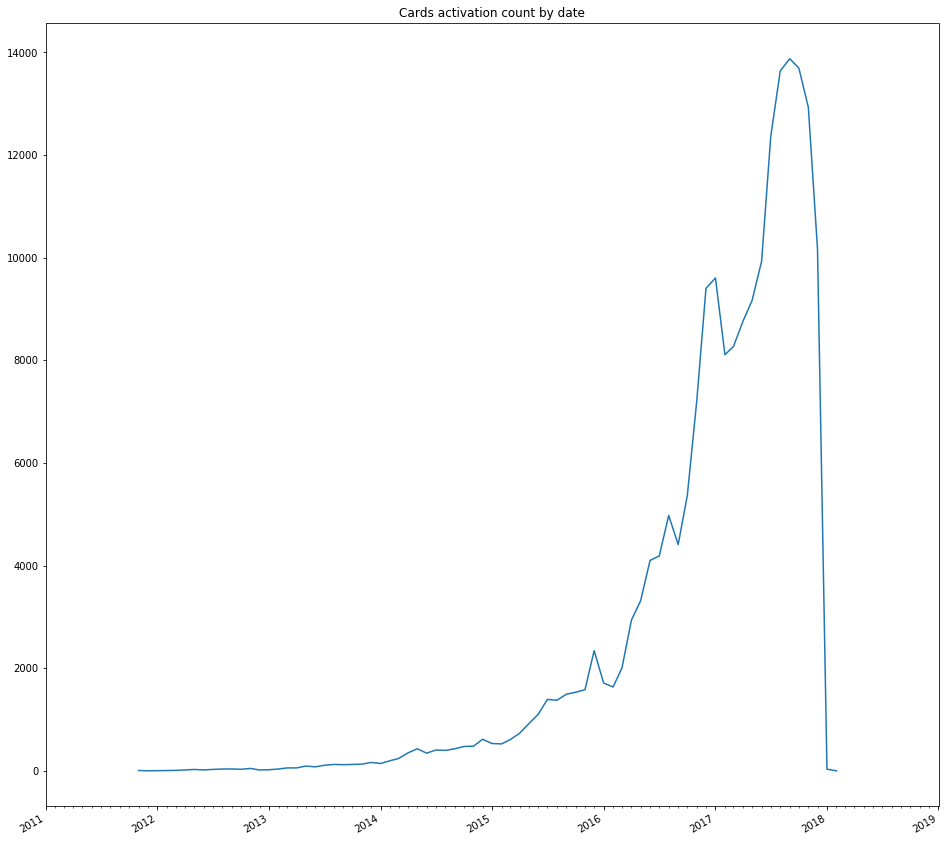

In [49]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.plot(
    sorted_by_datetime_count_train_data['first_active_month_as_datetime'],
    sorted_by_datetime_count_train_data['card_id']
)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
datemin = np.datetime64(sorted_by_datetime_count_train_data['first_active_month_as_datetime'][0], 'Y')
datemax = np.datetime64(sorted_by_datetime_count_train_data['first_active_month_as_datetime'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)
ax.set_title("Cards activation count by date")
fig.autofmt_xdate()

In [50]:
train_features_and_target = train_df[['feature_1', 'feature_2', 'feature_3', 'target']]

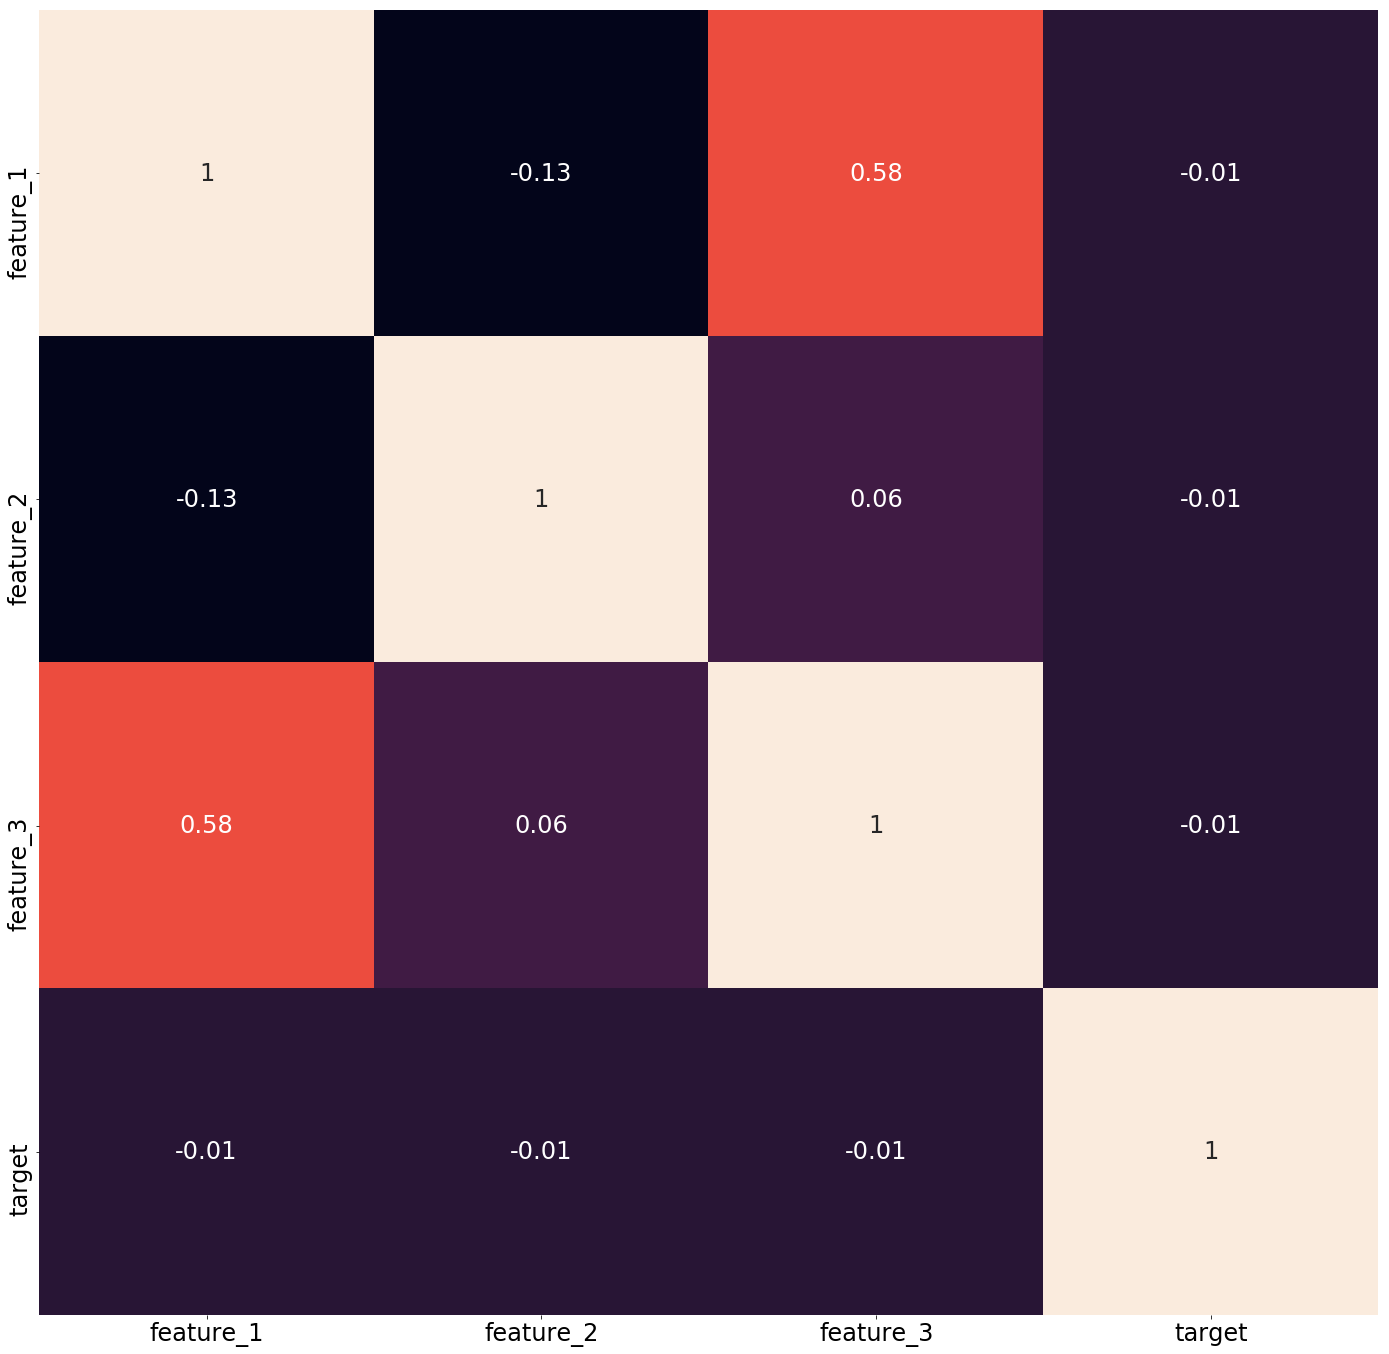

In [51]:
plt.figure(figsize=(24, 24))
heatmap_fig = sns.heatmap(
    train_features_and_target.corr().round(2),
    annot=True, annot_kws={"size":24},
    cbar=False
)
for item in heatmap_fig.get_xticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_yticklabels():
    item.set_fontsize(24)
for item in heatmap_fig.get_label():
    item.set_fontsize(24)

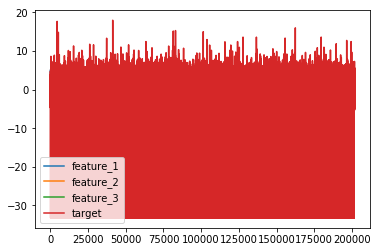

In [52]:
train_features_and_target.plot()

/home/uldo/miniconda3/envs/DS-New/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


[[None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None],
 [None, None]]

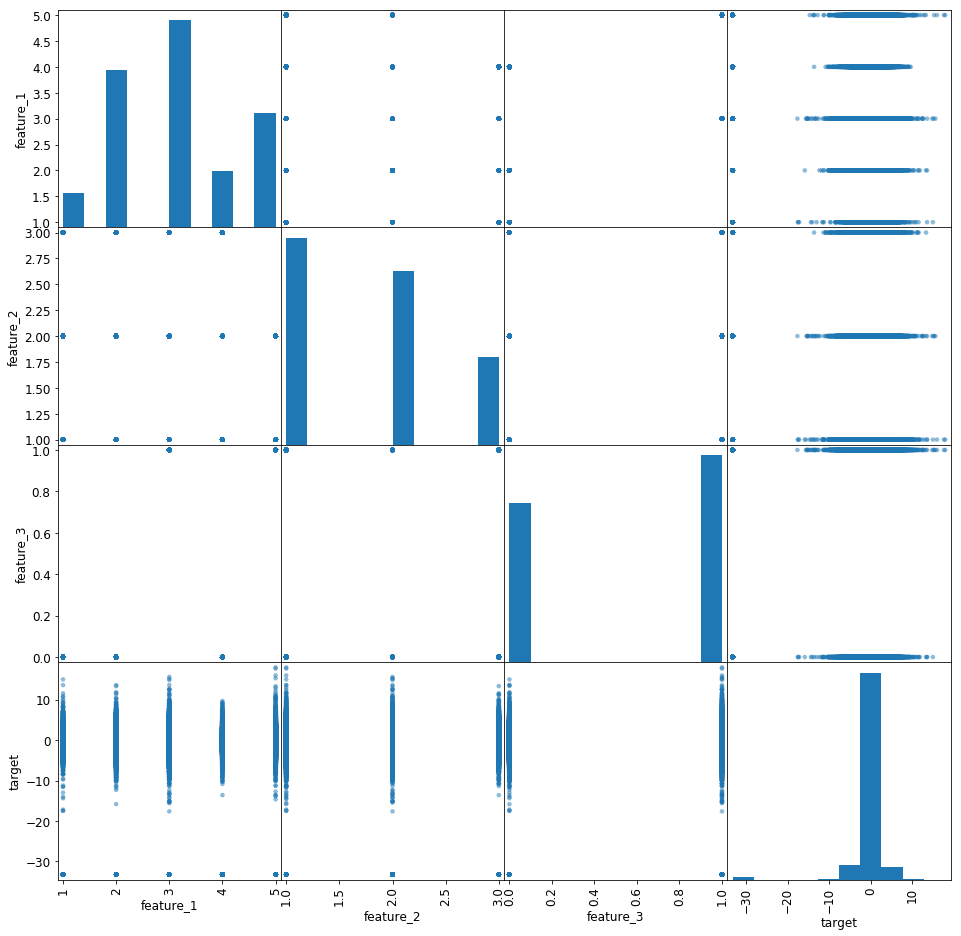

In [53]:
figure = plt.figure(figsize=(16, 16))
axes = figure.add_subplot(111)
axes_scatter_matrix = pd.plotting.scatter_matrix(train_features_and_target, ax=axes, marker='H', s=25)
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 12) for item in axes_scatter_matrix.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 12) for item in axes_scatter_matrix.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', 12) for item in axes_scatter_matrix.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 12) for item in axes_scatter_matrix.ravel()]

In [54]:
historical_transactions_df.describe()

,city_id,installments,merchant_category_id,month_lag,purchase_amount,category_2,state_id,subsector_id
count,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,2.911236e+07,26459497.0,2.911236e+07,2.911236e+07
mean,1.293256e+02,6.484954e-01,4.810130e+02,-4.487294e+00,3.640094e-02,NaN,1.056679e+01,2.684839e+01
std,1.042563e+02,2.795577e+00,2.493757e+02,3.588800e+00,1.123522e+03,0.0,6.366927e+00,9.692793e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.300000e+01,-7.469078e-01,1.0,-1.000000e+00,-1.000000e+00
25%,5.300000e+01,0.000000e+00,3.070000e+02,-7.000000e+00,-7.203559e-01,1.0,9.000000e+00,1.900000e+01
50%,9.000000e+01,0.000000e+00,4.540000e+02,-4.000000e+00,-6.883495e-01,1.0,9.000000e+00,2.900000e+01
75%,2.120000e+02,1.000000e+00,7.050000e+02,-2.000000e+00,-6.032543e-01,3.0,1.600000e+01,3.400000e+01
max,3.470000e+02,9.990000e+02,8.910000e+02,0.000000e+00,6.010604e+06,5.0,2.400000e+01,4.100000e+01


In [55]:
historical_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int16
category_1              object
installments            int16
category_3              object
merchant_category_id    int16
merchant_id             object
month_lag               int8
purchase_amount         float32
purchase_date           object
category_2              float16
state_id                int8
subsector_id            int8
dtypes: float16(1), float32(1), int16(3), int8(3), object(6)
memory usage: 1.7+ GB


In [56]:
historical_transactions_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [57]:
# historical_transactions_df['authorized_flag'].astype('str')

In [58]:
historical_transactions_df.loc[:, 'authorized_flag'] = historical_transactions_df['authorized_flag'].astype(str)

In [59]:
historical_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 14 columns):
authorized_flag         object
card_id                 object
city_id                 int16
category_1              object
installments            int16
category_3              object
merchant_category_id    int16
merchant_id             object
month_lag               int8
purchase_amount         float32
purchase_date           object
category_2              float16
state_id                int8
subsector_id            int8
dtypes: float16(1), float32(1), int16(3), int8(3), object(6)
memory usage: 1.7+ GB


In [60]:
authorized_flag = historical_transactions_df['authorized_flag'].astype(str)

In [61]:
authorized_flag.dtypes

dtype('O')

In [62]:
historical_transactions_df_row_0 = historical_transactions_df.iloc[0, :]

In [63]:
type(historical_transactions_df_row_0)

pandas.core.series.Series

In [64]:
for item in historical_transactions_df_row_0:
    print(type(item))

<class 'str'>
<class 'str'>
<class 'numpy.int16'>
<class 'str'>
<class 'numpy.int16'>
<class 'str'>
<class 'numpy.int16'>
<class 'str'>
<class 'numpy.int8'>
<class 'numpy.float32'>
<class 'str'>
<class 'numpy.float16'>
<class 'numpy.int8'>
<class 'numpy.int8'>


Сгруппировать т.ж. и по time без даты (т.е. узнать в какое время суток наиболее часто происходит purchase)
Сгруппировать т.ж. и по purchase ammoutn - т.е. поисследовать как и что зависить от размера purchase.

In [65]:
historical_transactions_df['purchase_date_as_date'] = pd.to_datetime(historical_transactions_df['purchase_date']).dt.date

In [66]:
historical_transactions_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id,purchase_date_as_date
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37,2017-06-25
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16,2017-07-15
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37,2017-08-09
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34,2017-09-02
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37,2017-03-10


In [67]:
historical_transactions_df_grouped_by_purchase_date = historical_transactions_df.groupby('purchase_date_as_date')

In [68]:
count_historical_transactions_grouped_by_purchase_date = historical_transactions_df_grouped_by_purchase_date.count()

In [69]:
count_historical_transactions_grouped_by_purchase_date.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
purchase_date_as_date,,,,,,,,,,,,,,
2017-01-01,11851,11851,11851,11851,11851,11851,11851,11843,11851,11851,11851,10762,11851,11851
2017-01-02,31170,31170,31170,31170,31170,31170,31170,31157,31170,31170,31170,29093,31170,31170
2017-01-03,34418,34418,34418,34418,34418,34418,34418,34412,34418,34418,34418,32086,34418,34418
2017-01-04,35876,35876,35876,35876,35876,35876,35876,35867,35876,35876,35876,33545,35876,35876
2017-01-05,37780,37780,37780,37780,37780,37780,37780,37773,37780,37780,37780,35248,37780,37780


In [70]:
count_historical_transactions_grouped_by_purchase_date.tail()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
purchase_date_as_date,,,,,,,,,,,,,,
2018-02-24,106205,106205,106205,106205,106205,104457,106205,103352,106205,106205,106205,97042,106205,106205
2018-02-25,66407,66407,66407,66407,66407,66029,66407,64709,66407,66407,66407,58573,66407,66407
2018-02-26,77998,77998,77998,77998,77998,76760,77998,76231,77998,77998,77998,68547,77998,77998
2018-02-27,84037,84037,84037,84037,84037,82705,84037,82014,84037,84037,84037,74146,84037,84037
2018-02-28,91375,91375,91375,91375,91375,89937,91375,90489,91375,91375,91375,80375,91375,91375


In [71]:
sorted_by_date_historical_transactions = count_historical_transactions_grouped_by_purchase_date.sort_values(by='purchase_date_as_date')

In [72]:
sorted_by_date_historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
purchase_date_as_date,,,,,,,,,,,,,,
2017-01-01,11851,11851,11851,11851,11851,11851,11851,11843,11851,11851,11851,10762,11851,11851
2017-01-02,31170,31170,31170,31170,31170,31170,31170,31157,31170,31170,31170,29093,31170,31170
2017-01-03,34418,34418,34418,34418,34418,34418,34418,34412,34418,34418,34418,32086,34418,34418
2017-01-04,35876,35876,35876,35876,35876,35876,35876,35867,35876,35876,35876,33545,35876,35876
2017-01-05,37780,37780,37780,37780,37780,37780,37780,37773,37780,37780,37780,35248,37780,37780


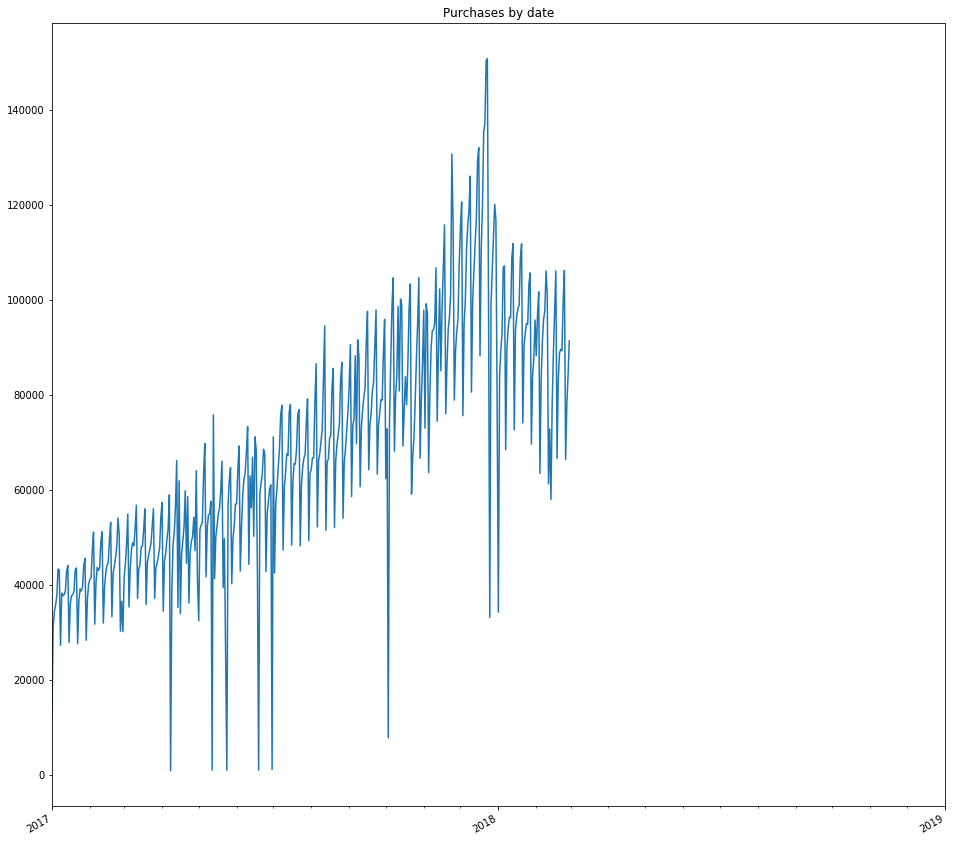

In [73]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.plot(
    sorted_by_date_historical_transactions.index,
    sorted_by_date_historical_transactions['card_id']
)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)
datemin = np.datetime64(sorted_by_date_historical_transactions.index[0], 'Y')
datemax = np.datetime64(sorted_by_date_historical_transactions.index[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)
ax.set_title("Purchases by date")
fig.autofmt_xdate()

In [74]:
historical_transactions_df_grouped_by_purchase_amount = historical_transactions_df.groupby('purchase_amount')

In [75]:
count_historical_transactions_grouped_by_purchase_amount = historical_transactions_df_grouped_by_purchase_amount.count()

In [76]:
count_historical_transactions_grouped_by_purchase_amount.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_date,category_2,state_id,subsector_id,purchase_date_as_date
purchase_amount,,,,,,,,,,,,,,
-0.746908,14,14,14,14,14,14,14,13,14,14,14,14,14,14
-0.746893,5157,5157,5157,5157,5157,5157,5157,5066,5157,5157,5044,5157,5157,5157
-0.746878,2368,2368,2368,2368,2368,2368,2368,1838,2368,2368,2335,2368,2368,2368
-0.746863,278,278,278,278,278,278,278,274,278,278,273,278,278,278
-0.746848,66,66,66,66,66,66,66,66,66,66,63,66,66,66


In [77]:
count_historical_transactions_grouped_by_purchase_amount.hist?

In [78]:
count_historical_transactions_grouped_by_purchase_amount.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 215014 entries, -0.7469077706336975 to 6010604.0
Data columns (total 14 columns):
authorized_flag          215014 non-null int64
card_id                  215014 non-null int64
city_id                  215014 non-null int64
category_1               215014 non-null int64
installments             215014 non-null int64
category_3               215014 non-null int64
merchant_category_id     215014 non-null int64
merchant_id              215014 non-null int64
month_lag                215014 non-null int64
purchase_date            215014 non-null int64
category_2               215014 non-null int64
state_id                 215014 non-null int64
subsector_id             215014 non-null int64
purchase_date_as_date    215014 non-null int64
dtypes: int64(14)
memory usage: 24.6 MB


In [79]:
historical_transactions_df.card_id.unique().shape

(325540,)

(array([1.45074e+05, 4.30160e+04, 1.27170e+04, 5.14100e+03, 2.77100e+03,
        1.60700e+03, 9.52000e+02, 5.68000e+02, 4.71000e+02, 3.20000e+02,
        2.50000e+02, 1.93000e+02, 1.40000e+02, 1.22000e+02, 7.00000e+01,
        7.50000e+01, 6.80000e+01, 5.60000e+01, 4.00000e+01, 4.60000e+01]),
 array([-0.74690777,  1.78355686,  4.31402149,  6.84448611,  9.37495074,
        11.90541537, 14.43588   , 16.96634463, 19.49680926, 22.02727388,
        24.55773851, 27.08820314, 29.61866777, 32.1491324 , 34.67959703,
        37.21006165, 39.74052628, 42.27099091, 44.80145554, 47.33192017,
        49.8623848 ]),
 <a list of 20 Patch objects>)

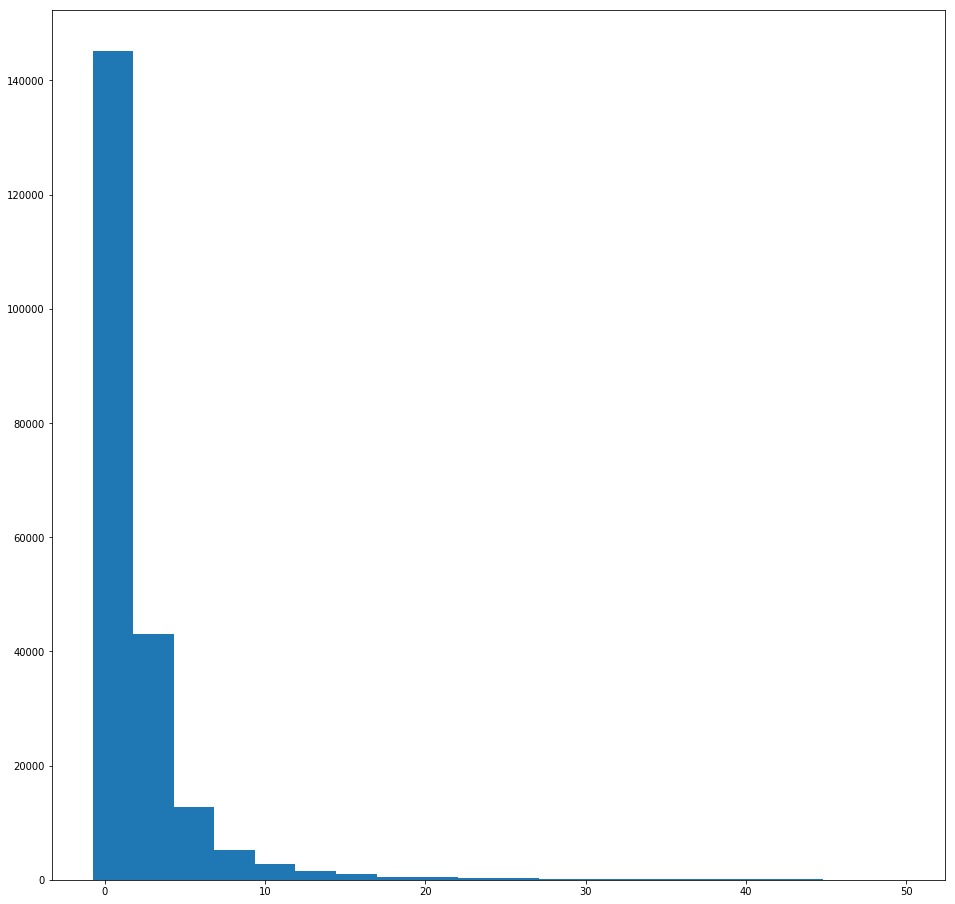

In [80]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.hist(
    count_historical_transactions_grouped_by_purchase_amount.index[
        count_historical_transactions_grouped_by_purchase_amount.index <= 50],
    bins=20
)
#ax.set_xlim(0, 400000)

In [81]:
historical_transactions_df_sorted_by_purchase_amount = historical_transactions_df.sort_values(by='purchase_amount')

In [82]:
#historical_transactions_df_sorted_by_purchase_amount_less_then_200000 = historical_transactions_df_sorted_by_purchase_amount[
    #historical_transactions_df_sorted_by_purchase_amount['purchase_amount'] < 200000]

In [83]:
#fig, ax = plt.subplots(figsize=(16, 16))
#ax.hist(
#    historical_transactions_df_sorted_by_purchase_amount_less_then_200000,
#    bins=30
#)
#ax.set_xlim(0, 400000)

(array([1.00252e+05, 5.99560e+04, 2.39210e+04, 1.10250e+04, 5.92100e+03,
        3.40900e+03, 2.31600e+03, 1.61500e+03, 1.09900e+03, 8.89000e+02,
        6.07000e+02, 4.40000e+02, 3.59000e+02, 3.10000e+02, 2.41000e+02,
        1.98000e+02, 1.62000e+02, 1.53000e+02, 1.26000e+02, 1.00000e+02]),
 array([-0.74690777,  0.78918487,  2.32527751,  3.86137016,  5.3974628 ,
         6.93355544,  8.46964808, 10.00574072, 11.54183336, 13.07792601,
        14.61401865, 16.15011129, 17.68620393, 19.22229657, 20.75838922,
        22.29448186, 23.8305745 , 25.36666714, 26.90275978, 28.43885243,
        29.97494507]),
 <a list of 20 Patch objects>)

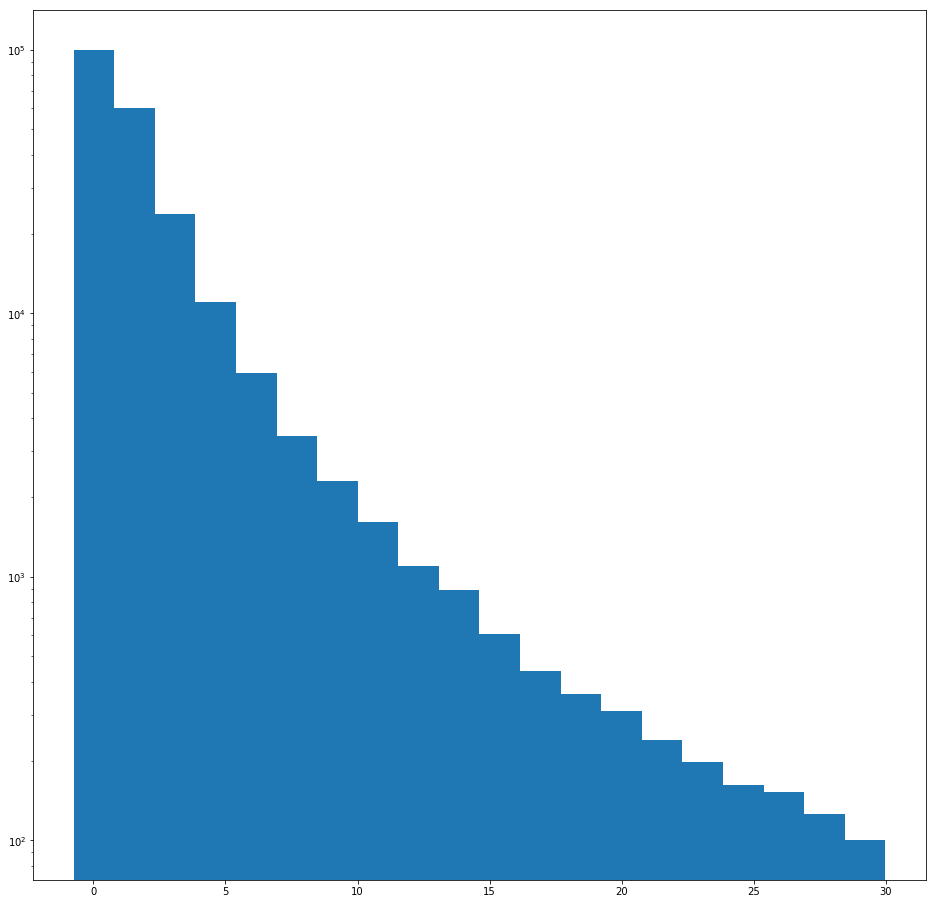

In [84]:
fig, ax = plt.subplots(figsize=(16, 16))
'''
ax.hist(
    count_historical_transactions_grouped_by_purchase_amount.index[
        ((count_historical_transactions_grouped_by_purchase_amount.index) > 50 and (count_historical_transactions_grouped_by_purchase_amount.index < 1000))],
    bins=20
)
'''
ax.hist(
    count_historical_transactions_grouped_by_purchase_amount.index[
        count_historical_transactions_grouped_by_purchase_amount.index < 30],
    bins=20,
    log=True
)

In [85]:
count_historical_transactions_grouped_by_purchase_amount.index.max()

6010604.0

In [86]:
count_historical_transactions_grouped_by_purchase_amount.index.min()

-0.7469077706336975

In [87]:
sorted_purchase_amount = count_historical_transactions_grouped_by_purchase_amount.index.sort_values()

In [88]:
sorted_purchase_amount

Float64Index([-0.7469077706336975, -0.7468927502632141, -0.7468777298927307,
              -0.7468627095222473, -0.7468476891517639, -0.7468326687812805,
              -0.7468176484107971, -0.7468026280403137, -0.7467876076698303,
              -0.7467725872993469,
              ...
                   119919.5703125,       120215.109375,       127731.546875,
                    134758.828125,        135241.46875,         135766.0625,
                    138245.015625,       147260.578125,           165298.75,
                        6010604.0],
             dtype='float64', name='purchase_amount', length=215014)

In [89]:
historical_transactions_df_grouped_by_cart_id = historical_transactions_df.groupby('card_id')

In [90]:
type(historical_transactions_df_grouped_by_cart_id )

pandas.core.groupby.groupby.DataFrameGroupBy

In [91]:
purchase_amount_historical_transaction = historical_transactions_df[['card_id', 'purchase_amount']]

In [92]:
purchase_amount_historical_transaction

,card_id,purchase_amount
0,C_ID_4e6213e9bc,-0.703331
1,C_ID_4e6213e9bc,-0.733128
2,C_ID_4e6213e9bc,-0.720386
3,C_ID_4e6213e9bc,-0.735352
4,C_ID_4e6213e9bc,-0.722865
5,C_ID_4e6213e9bc,-0.734887
6,C_ID_4e6213e9bc,-0.716855
7,C_ID_4e6213e9bc,-0.657049
8,C_ID_4e6213e9bc,-0.737967
9,C_ID_4e6213e9bc,-0.715352


In [93]:
purchase_amount_historical_transaction_grouped_by_card_id = purchase_amount_historical_transaction.groupby('card_id')

In [94]:
sum_purchase_amount_historical_transaction_grouped_by_card_id = purchase_amount_historical_transaction_grouped_by_card_id.sum()

In [95]:
count_purchase_amount_historical_transaction_grouped_by_card_id = purchase_amount_historical_transaction_grouped_by_card_id.count()

In [96]:
card_id_purchase_amount_stats = pd.merge(
    count_purchase_amount_historical_transaction_grouped_by_card_id,
    sum_purchase_amount_historical_transaction_grouped_by_card_id,
    on='card_id',
    suffixes=('_count', '_sum')
)

In [97]:
card_id_purchase_amount_stats.head()

,purchase_amount_count,purchase_amount_sum
card_id,,
C_ID_00007093c1,149,-76.845039
C_ID_0001238066,123,-72.447197
C_ID_0001506ef0,66,-34.601879
C_ID_0001793786,216,-36.786011
C_ID_000183fdda,144,-68.837936


In [98]:
card_id_purchase_amount_stats.tail()

,purchase_amount_count,purchase_amount_sum
card_id,,
C_ID_ffff1d9928,12,-7.477673
C_ID_ffff579d3a,114,-80.292770
C_ID_ffff756266,24,-5.506420
C_ID_ffff828181,190,-120.099197
C_ID_fffffd5772,84,-58.035275


In [99]:
print(card_id_purchase_amount_stats['purchase_amount_count'].unique())
print(len(card_id_purchase_amount_stats['purchase_amount_count'].unique()))

[ 149  123   66 ...  770  874 1428]
1111


In [100]:
card_id_purchase_amount_stats.hist?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5514e96a90>,
      dtype=object)

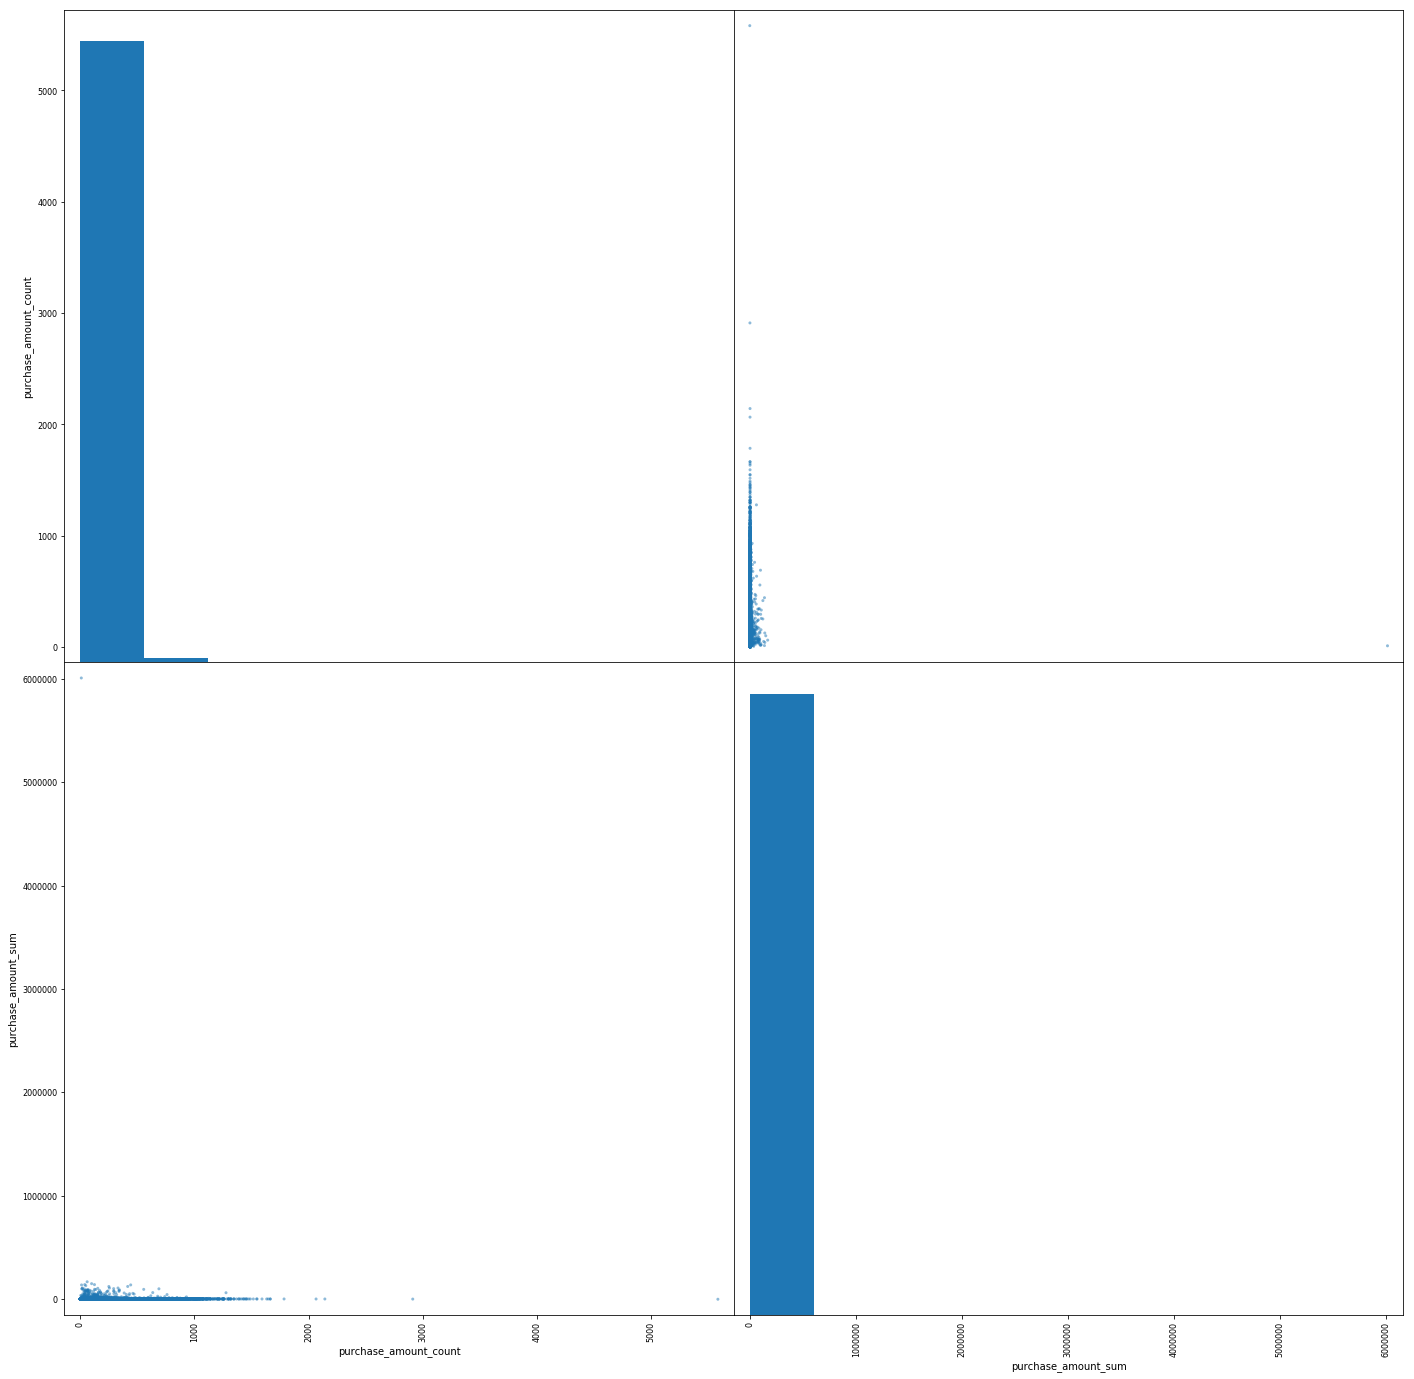

In [101]:
pd.scatter_matrix(card_id_purchase_amount_stats, figsize=(24, 24))

Feature engineering
Поробовать линейные комбинации признаков, как "родных" так и сгенерённых в kernels которые лежат в дирректории code. Как то это сделать посредством скриптов, не делать наобум. Попробовать нелинейнейные комбинации?
Ну и посилледвать ещё всё "вручную" поискать какие либо ещё закономерности, линейные, нелинейные, как то попробовать применить статистику, RandomForest и т.д. Использовать, среднии арифметические, средние геометрические, средние гармонические?
Кластеризация? Почитать различные handbooks с "рецептами" по поводу feature engineering.

In [102]:
historical_transactions_df['purchase_time_as_time'] = pd.to_datetime(historical_transactions_df['purchase_date']).dt.time

In [103]:
historical_transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29112361 entries, 0 to 29112360
Data columns (total 16 columns):
authorized_flag          object
card_id                  object
city_id                  int16
category_1               object
installments             int16
category_3               object
merchant_category_id     int16
merchant_id              object
month_lag                int8
purchase_amount          float32
purchase_date            object
category_2               float16
state_id                 int8
subsector_id             int8
purchase_date_as_date    object
purchase_time_as_time    object
dtypes: float16(1), float32(1), int16(3), int8(3), object(8)
memory usage: 2.1+ GB


In [104]:
train_df.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820312
1,2017-01,C_ID_3d0044924f,4,1,0,0.392822
2,2016-08,C_ID_d639edf6cd,2,2,0,0.687988
3,2017-09,C_ID_186d6a6901,4,3,0,0.142456
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159790


In [105]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201917 entries, 0 to 201916
Data columns (total 6 columns):
first_active_month    201917 non-null object
card_id               201917 non-null object
feature_1             201917 non-null int8
feature_2             201917 non-null int8
feature_3             201917 non-null int8
target                201917 non-null float16
dtypes: float16(1), int8(3), object(2)
memory usage: 4.0+ MB


In [108]:
train_df['card_id'].unique().shape

(201917,)

In [109]:
pd.merge?

In [116]:
historical_transactions_df_grouped_by_cart_id = historical_transactions_df.groupby('card_id')

In [117]:
agg_func = {'purchase_amount': ['sum']}

In [118]:
ht_group_by_card_id_agg_sum_pa = historical_transactions_df_grouped_by_cart_id.agg(agg_func)

In [119]:
ht_group_by_card_id_agg_sum_pa.head()

,purchase_amount
,sum
card_id,
C_ID_00007093c1,-76.845039
C_ID_0001238066,-72.447197
C_ID_0001506ef0,-34.601879
C_ID_0001793786,-36.786011
C_ID_000183fdda,-68.837936


In [114]:
ht_group_by_card_id_agg_sum_pa.columns = ['_'.join(col).strip() for col in ht_group_by_card_id_agg_sum_pa.columns.values]

In [115]:
ht_group_by_card_id_agg_sum_pa.head()

,purchase_amount_sum
card_id,
C_ID_00007093c1,-76.845039
C_ID_0001238066,-72.447197
C_ID_0001506ef0,-34.601879
C_ID_0001793786,-36.786011
C_ID_000183fdda,-68.837936
